# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Daniel Adejumo \
**Email:** dxa239@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

**1. Generalization to New Speakers**
* **Strategy:** Split the dataset by **User ID** (Speaker Level Split), not by individual recordings.
* **Reasoning:** If we split randomly by recording (shuffling everything together), the training set and test set will contain the same speakers. The model might learn to recognize "Speaker A's voice" rather than learning general phonetic features (Data Leakage). By holding out entire speakers, we ensure the test set represents truly unseen users.
* **Implementation:**
    * **Training Set:** Data from 70 users (approx 70%).
    * **Validation Set:** Data from 15 users (approx 15%).
    * **Test Set:** Data from the remaining 15 users (approx 15%).

**2. Adaptation to Kilian**
* **Strategy:** Fine-tuning (Transfer Learning).
* **Process:**
    1.  **Base Model:** Train a general model on the original 100-speaker dataset using the strategy above.
    2.  **Kilian's Split:** Split Kilian's 10,000 recordings into specific sets:
        * **Kilian-Train (80%):** Used to fine-tune the weights of the base model.
        * **Kilian-Val (10%):** Used for early stopping during fine-tuning (to prevent overfitting to his specific noise/mic).
        * **Kilian-Test (10%):** Used to verify the final performance for him.
    3.  **Regularization:** To maintain generalization (prevent catastrophic forgetting), use a lower learning rate during fine-tuning or mix in a small portion of the original general data during the Kilian-training steps.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


1. Plotting 1-NN Decision Boundary...


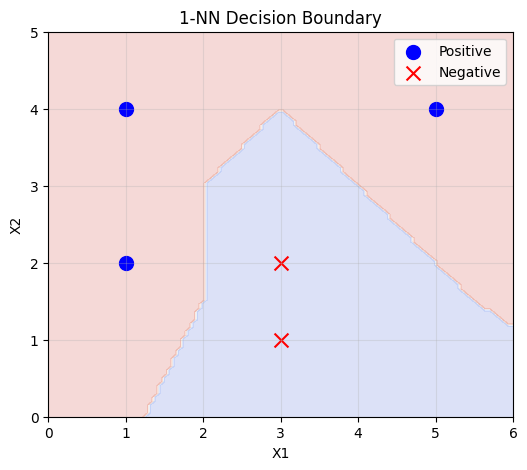

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# --- Part 1: 1-NN Plot ---
print("1. Plotting 1-NN Decision Boundary...")
X_pos = np.array([[1, 2], [1, 4], [5, 4]])
X_neg = np.array([[3, 1], [3, 2]])
X_train = np.vstack([X_pos, X_neg])
y_train = np.array([1, 1, 1, 0, 0]) # 1: Pos, 0: Neg

# Create meshgrid for visualization
xx, yy = np.meshgrid(np.linspace(0, 6, 100), np.linspace(0, 5, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict using 1-NN
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
Z = clf.predict(grid_points).reshape(xx.shape)

# Plot
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='blue', marker='o', s=100, label='Positive')
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='red', marker='x', s=100, label='Negative')
plt.title("1-NN Decision Boundary")
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.3)
plt.show()

##### Part 2: Feature Scaling Analysis
Query Point Q: (500, 1)
   - BEFORE Scaling: \
     Distance to P(500, 4) is sqrt((500-500)^2 + (1-4)^2) = 3. \
     Distance to N(300, 1) is sqrt((500-300)^2 + (1-1)^2) = 200. \
     Result: POSITIVE (Closest to P(500,4)) \

   - AFTER Scaling [0,1]: \
     Range X1=[100, 500] (size 400), Range X2=[1, 4] (size 3). \
     Q(500,1) -> (1.0, 0.0) \
     P(500,4) -> (1.0, 1.0) -> Dist = 1.0 \
     N(300,1) -> (0.5, 0.0) -> Dist = 0.5 \
     Result: NEGATIVE (Closest to N(300,1)) \
   Conclusion: The large magnitude of feature 1 dominated distance before scaling.


##### Part 3. Handling Missing Values:
   - Imputation: Fill missing values with the mean or median of that feature from the training set.
   - Distance Adjustment: Calculate distance using only available dimensions, then scale the result by (Total_Dim / Available_Dim).


##### Part 4. Why K-NN works on images:
   - While images have high dimensionality (pixels), real-world images lie on a lower-dimensional manifold.
   - Local correlations exist; an image of a '3' shares structure with other '3's, making distance metrics effective if data is dense enough.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

**1. Does evaluating h(x) help?**
Yes. By evaluating the hypothesis $h(x)$ on every point in both sets, we can explicitly calculate the misclassification rate (accuracy). Comparing the **Training Accuracy** vs. **Test Accuracy** is the primary method to detect **overfitting**. If training error is near 0 but test error is high, the model has overfit.

**2. Why no explicit training error computation?**
The standard Perceptron algorithm is **error-driven**. It works by iterating through the dataset and making updates *only* when it makes a mistake. It continues looping until it makes a complete pass through the training data with **zero mistakes** (assuming the data is linearly separable). Therefore, the algorithm's termination condition *guarantees* that the training error is 0. We don't need a separate step to calculate it.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [4]:
import numpy as np

print("Running Perceptron...")
X = np.array([[10, -2], [12, 2]]) # x1 (Pos), x2 (Neg)
y = np.array([1, -1])
w = np.array([0, 0])
eta = 1

converged = False
updates = 0
max_iter = 20

print(f"Start: w={w}")

while not converged and updates < max_iter:
    mistake_found = False
    for i in range(len(X)):
        # Check condition y*(w.x) <= 0
        if y[i] * np.dot(w, X[i]) <= 0:
            # Mistake found
            print(f"Mistake on point {i+1} (Target {y[i]}). Update: w = w + ({y[i]})*({X[i]})")
            w = w + eta * y[i] * X[i]
            updates += 1
            mistake_found = True
            print(f"  -> New w: {w}")
            # Perceptron continues to check the next point in the epoch
    
    if not mistake_found:
        converged = True

print(f"\nConverged in {updates} total updates.")
print(f"Final w: {w}")

Running Perceptron...
Start: w=[0 0]
Mistake on point 1 (Target 1). Update: w = w + (1)*([10 -2])
  -> New w: [10 -2]
Mistake on point 2 (Target -1). Update: w = w + (-1)*([12  2])
  -> New w: [-2 -4]
Mistake on point 1 (Target 1). Update: w = w + (1)*([10 -2])
  -> New w: [ 8 -6]
Mistake on point 2 (Target -1). Update: w = w + (-1)*([12  2])
  -> New w: [-4 -8]
Mistake on point 1 (Target 1). Update: w = w + (1)*([10 -2])
  -> New w: [  6 -10]
Mistake on point 2 (Target -1). Update: w = w + (-1)*([12  2])
  -> New w: [ -6 -12]
Mistake on point 1 (Target 1). Update: w = w + (1)*([10 -2])
  -> New w: [  4 -14]
Mistake on point 2 (Target -1). Update: w = w + (-1)*([12  2])
  -> New w: [ -8 -16]
Mistake on point 1 (Target 1). Update: w = w + (1)*([10 -2])
  -> New w: [  2 -18]

Converged in 9 total updates.
Final w: [  2 -18]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [5]:
import numpy as np

# Initial w
w = np.zeros(5)

# Updates log: (x vector, y, count)
updates_log = [
    (np.array([0, 0, 0, 0, 4]),  1, 2),
    (np.array([0, 0, 6, 5, 0]),  1, 1),
    (np.array([3, 0, 0, 0, 0]), -1, 1),
    (np.array([0, 9, 3, 6, 0]), -1, 1),
    (np.array([0, 1, 0, 2, 5]), -1, 1)
]

print("Computing final weight vector by summing updates...")
print(f"Initial w: {w}")

for x_vec, y_label, count in updates_log:
    update_val = count * y_label * x_vec
    w = w + update_val
    print(f"Update: {count} * ({y_label}) * {x_vec} = {update_val}  ->  w_accum: {w}")

print(f"\nFinal Weight Vector: {w}")

Computing final weight vector by summing updates...
Initial w: [0. 0. 0. 0. 0.]
Update: 2 * (1) * [0 0 0 0 4] = [0 0 0 0 8]  ->  w_accum: [0. 0. 0. 0. 8.]
Update: 1 * (1) * [0 0 6 5 0] = [0 0 6 5 0]  ->  w_accum: [0. 0. 6. 5. 8.]
Update: 1 * (-1) * [3 0 0 0 0] = [-3  0  0  0  0]  ->  w_accum: [-3.  0.  6.  5.  8.]
Update: 1 * (-1) * [0 9 3 6 0] = [ 0 -9 -3 -6  0]  ->  w_accum: [-3. -9.  3. -1.  8.]
Update: 1 * (-1) * [0 1 0 2 5] = [ 0 -1  0 -2 -5]  ->  w_accum: [ -3. -10.   3.  -3.   3.]

Final Weight Vector: [ -3. -10.   3.  -3.   3.]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

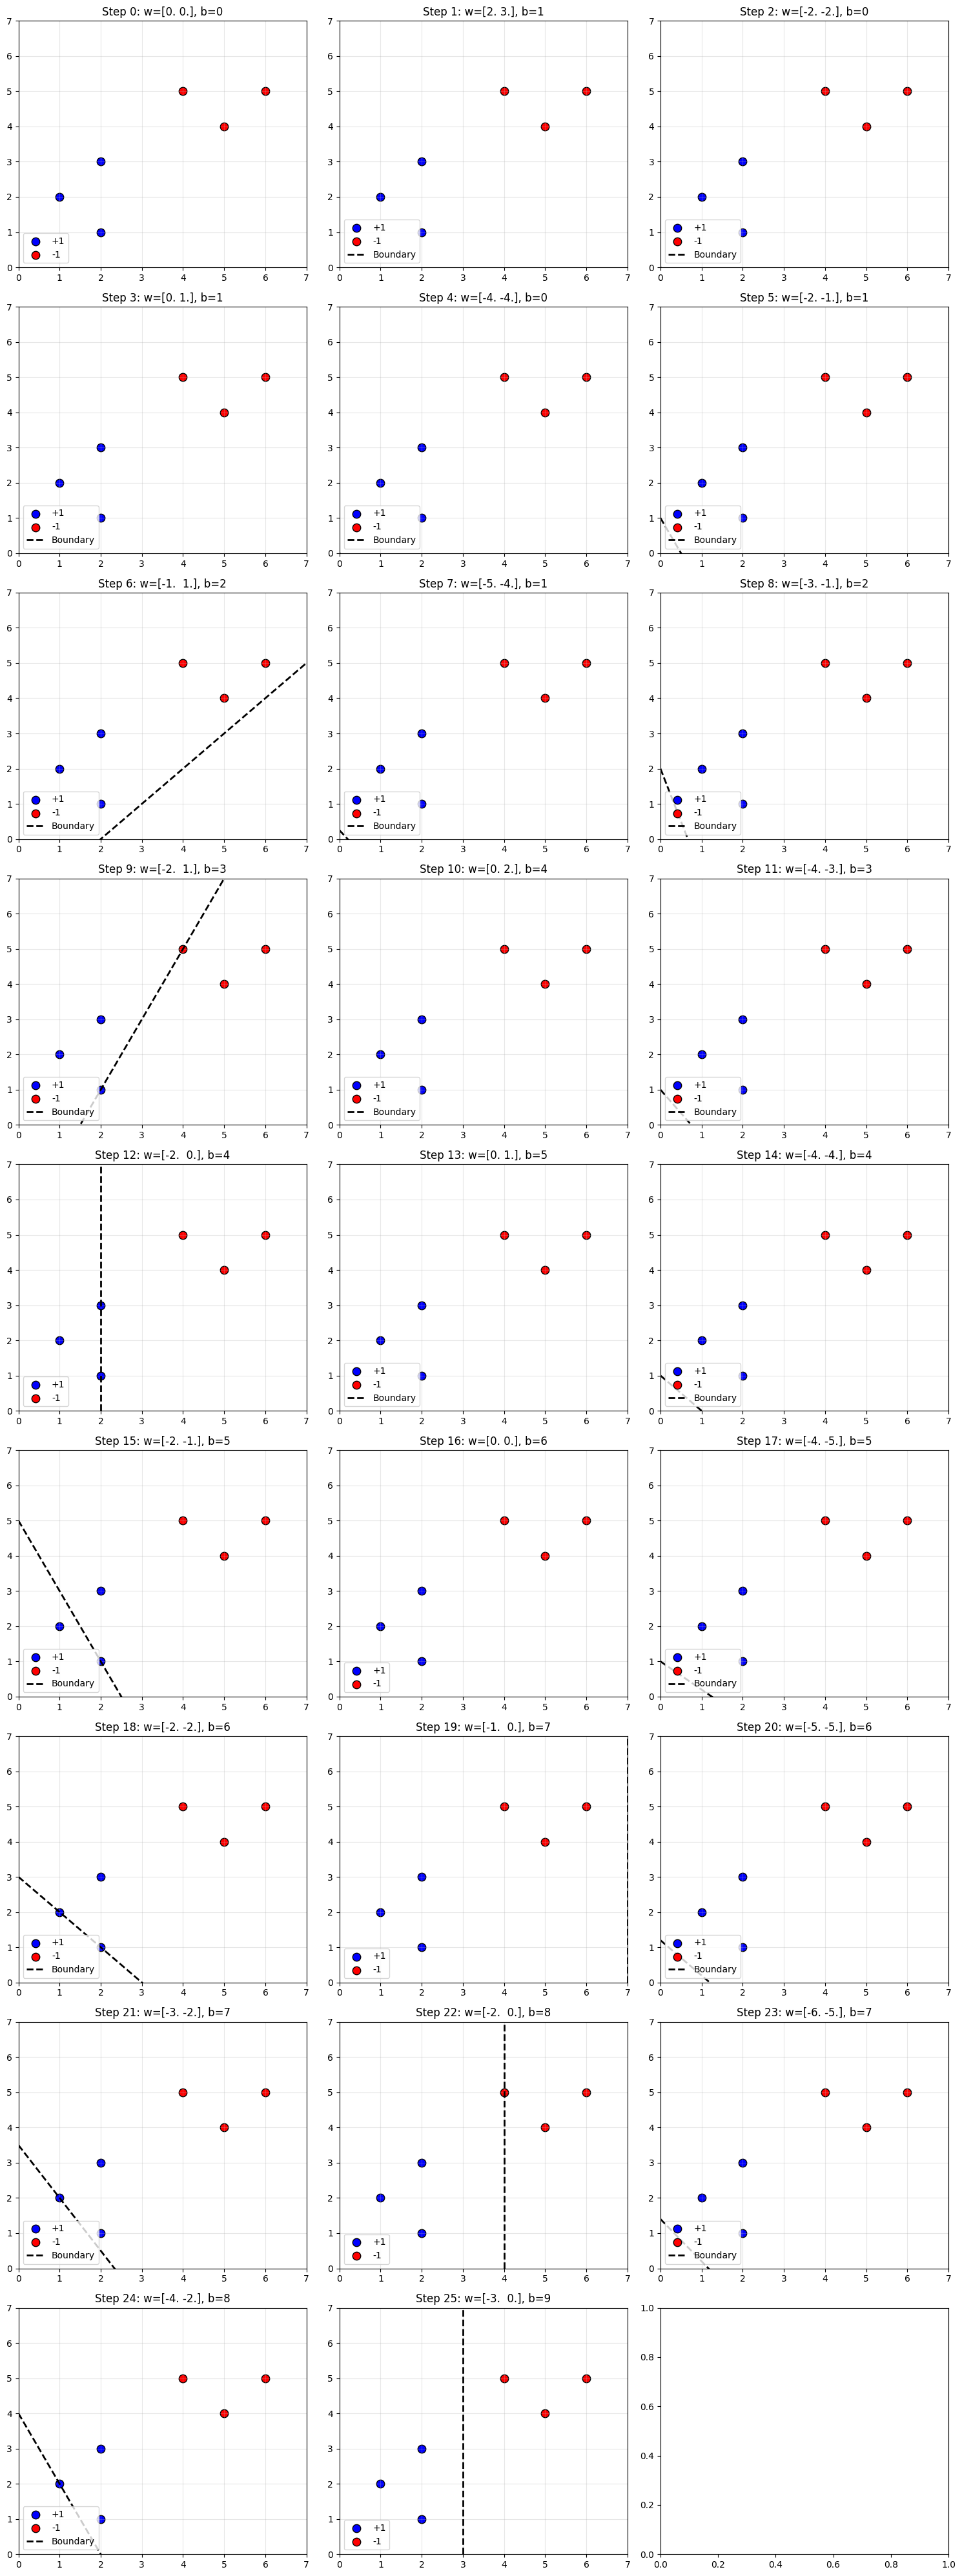

Converged after 25 total updates. Final weights: [-3.  0.], bias: 9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a small linearly separable dataset
# Class +1 (Blue), Class -1 (Red)
X = np.array([[2, 3], [1, 2], [2, 1], [4, 5], [5, 4], [6, 5]])
y = np.array([1, 1, 1, -1, -1, -1])

# Initialize
w = np.zeros(2)
b = 0
lr = 1

def plot_boundary(ax, X, y, w, b, step):
    # Plot points
    ax.scatter(X[y==1][:, 0], X[y==1][:, 1], c='blue', label='+1', s=80, edgecolors='k')
    ax.scatter(X[y==-1][:, 0], X[y==-1][:, 1], c='red', label='-1', s=80, edgecolors='k')
    
    # Plot Decision Boundary: w1*x + w2*y + b = 0 => y = -(w1*x + b)/w2
    x_range = np.linspace(0, 8, 100)
    if w[1] != 0:
        y_range = -(w[0]*x_range + b) / w[1]
        ax.plot(x_range, y_range, 'k--', linewidth=2, label='Boundary')
    elif w[0] != 0:
        # Vertical line case
        ax.axvline(-b/w[0], color='k', linestyle='--', linewidth=2)
        
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 7)
    ax.set_title(f"Step {step}: w={w}, b={b}")
    ax.legend(loc='lower left')
    ax.grid(True, alpha=0.3)

# Training & Visualization Loop
fig, axes = plt.subplots(9, 3, figsize=(15, 40))
axes = axes.flatten()

converged = False
step = 0
plot_idx = 0

# Plot initial state
plot_boundary(axes[plot_idx], X, y, w, b, 0)
plot_idx += 1

while not converged and step < 100:
    mistake = False
    for i in range(len(X)):
        if y[i] * (np.dot(w, X[i]) + b) <= 0:
            w = w + lr * y[i] * X[i]
            b = b + lr * y[i]
            mistake = True
            step += 1
            
            # Visualize updates
            if plot_idx < len(axes):
                plot_boundary(axes[plot_idx], X, y, w, b, step)
                plot_idx += 1
    
    if not mistake:
        converged = True

plt.tight_layout()
plt.show()
print(f"Converged after {step} total updates. Final weights: {w}, bias: {b}")